<a href="https://colab.research.google.com/github/christ-bot/christ-bot/blob/main/Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring and Identifying Red Flags in Car Body Type Data

The project aims to provide insights into potential data issues, particularly focusing on cars with unusual patterns of body type associations. This analysis helps in identifying and flagging data points that might require further investigation or correction.

importing necessary libraries for data manipulation and analysis


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Replace 'csv' with the actual file path
#Load your car data into a Pandas DataFrame

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Current Distinct SKU Body Types - Pivot Table 1.csv',header =1,index_col=0)

In [21]:
df

,Bus,Convertible,Coupe,Crossover,hatchback,Minivan,Other,Pickup,Sedan,Station Wagon,SUV,Trailer,Truck,Grand Total,count
SKU_2,,,,,,,,,,,,,,,
,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1,8
ABARTH 500,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1,5
ABARTH 500C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1,4
ABARTH 595 Turismo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,2
ABARTH 595C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo V90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1,3
Volvo XC60,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,3
Volvo XC70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2


exploring the data to get an understanding of its structure and content.

In [22]:
print(df.head())

                    Bus  Convertible  Coupe  Crossover  hatchback  Minivan  \
SKU_2                                                                        
                    1.0          NaN    1.0        1.0        NaN      1.0   
ABARTH 500          NaN          NaN    NaN        NaN        1.0      1.0   
ABARTH 500C         NaN          NaN    NaN        NaN        NaN      1.0   
ABARTH 595 Turismo  NaN          NaN    NaN        NaN        NaN      NaN   
ABARTH 595C         NaN          NaN    NaN        NaN        NaN      NaN   

                    Other  Pickup  Sedan  Station Wagon  SUV  Trailer  Truck  \
SKU_2                                                                          
                      NaN     NaN    1.0            NaN  1.0      NaN    1.0   
ABARTH 500            NaN     1.0    NaN            NaN  1.0      NaN    NaN   
ABARTH 500C           NaN     1.0    NaN            NaN  1.0      NaN    NaN   
ABARTH 595 Turismo    NaN     1.0    NaN            N

In [23]:
print(df.describe())

              Bus  Convertible       Coupe   Crossover   hatchback  \
count  162.000000    41.000000  168.000000  160.000000  473.000000   
mean     1.987654     1.951220    1.988095    1.987500    2.000000   
std     12.570787     6.090777   12.807178   12.490997   21.702534   
min      1.000000     1.000000    1.000000    1.000000    1.000000   
25%      1.000000     1.000000    1.000000    1.000000    1.000000   
50%      1.000000     1.000000    1.000000    1.000000    1.000000   
75%      1.000000     1.000000    1.000000    1.000000    1.000000   
max    161.000000    40.000000  167.000000  159.000000  473.000000   

          Minivan      Other      Pickup      Sedan  Station Wagon  \
count  176.000000  86.000000  190.000000  715.00000     281.000000   
mean     1.988636   1.976744    1.989474    2.00000       1.992883   
std     13.115743   9.057953   13.638954   26.70206      16.643745   
min      1.000000   1.000000    1.000000    1.00000       1.000000   
25%      1.000000  

In [24]:
print(df.isnull().sum())

Bus              1458
Convertible      1579
Coupe            1452
Crossover        1460
hatchback        1147
Minivan          1444
Other            1534
Pickup           1430
Sedan             905
Station Wagon    1339
SUV               803
Trailer          1597
Truck            1364
Grand Total         0
count               0
dtype: int64


Check for cars with more than 3 body types

In [25]:
red_flag_cars = df[df['count'] > 3]

# Display red flag cars

In [26]:
print("Cars with more than 3 body types (red flags):")
print(red_flag_cars)

Cars with more than 3 body types (red flags):
               Bus  Convertible  Coupe  Crossover  hatchback  Minivan  Other  \
SKU_2                                                                          
               1.0          NaN    1.0        1.0        NaN      1.0    NaN   
ABARTH 500     NaN          NaN    NaN        NaN        1.0      1.0    NaN   
ABARTH 500C    NaN          NaN    NaN        NaN        NaN      1.0    NaN   
Acura MDX      NaN          NaN    NaN        1.0        1.0      NaN    1.0   
Acura RDX      NaN          NaN    NaN        1.0        NaN      NaN    NaN   
...            ...          ...    ...        ...        ...      ...    ...   
Volvo V40      NaN          NaN    NaN        1.0        1.0      NaN    NaN   
Volvo V50      NaN          NaN    NaN        NaN        1.0      NaN    NaN   
Volvo V60      NaN          NaN    NaN        NaN        1.0      NaN    NaN   
Volvo XC90     NaN          NaN    NaN        1.0        1.0      NaN    N

# Visualize the distribution of counts

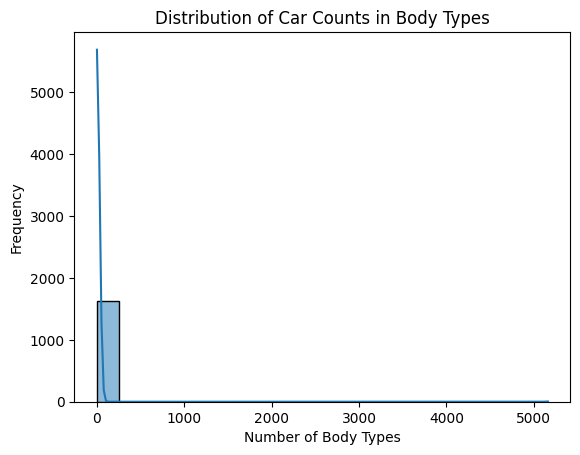

In [27]:
sns.histplot(df['count'], bins=20, kde=True)
plt.title('Distribution of Car Counts in Body Types')
plt.xlabel('Number of Body Types')
plt.ylabel('Frequency')
plt.show()

# Data Exploration and Cleaning
# Drop rows with missing values

In [28]:
df = df.dropna(axis=0, how='all').dropna(axis=1, how='all')



# Drop the "Grand Total" row and column

In [34]:
columns_to_drop = ['Grand Total', 'count']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [36]:
print(df.head())


                    Bus  Convertible  Coupe  Crossover  hatchback  Minivan  \
SKU_2                                                                        
                    1.0          NaN    1.0        1.0        NaN      1.0   
ABARTH 500          NaN          NaN    NaN        NaN        1.0      1.0   
ABARTH 500C         NaN          NaN    NaN        NaN        NaN      1.0   
ABARTH 595 Turismo  NaN          NaN    NaN        NaN        NaN      NaN   
ABARTH 595C         NaN          NaN    NaN        NaN        NaN      NaN   

                    Other  Pickup  Sedan  Station Wagon  SUV  Trailer  Truck  
SKU_2                                                                         
                      NaN     NaN    1.0            NaN  1.0      NaN    1.0  
ABARTH 500            NaN     1.0    NaN            NaN  1.0      NaN    NaN  
ABARTH 500C           NaN     1.0    NaN            NaN  1.0      NaN    NaN  
ABARTH 595 Turismo    NaN     1.0    NaN            NaN  N

# bar chart is created to visualize the number of body types per car.



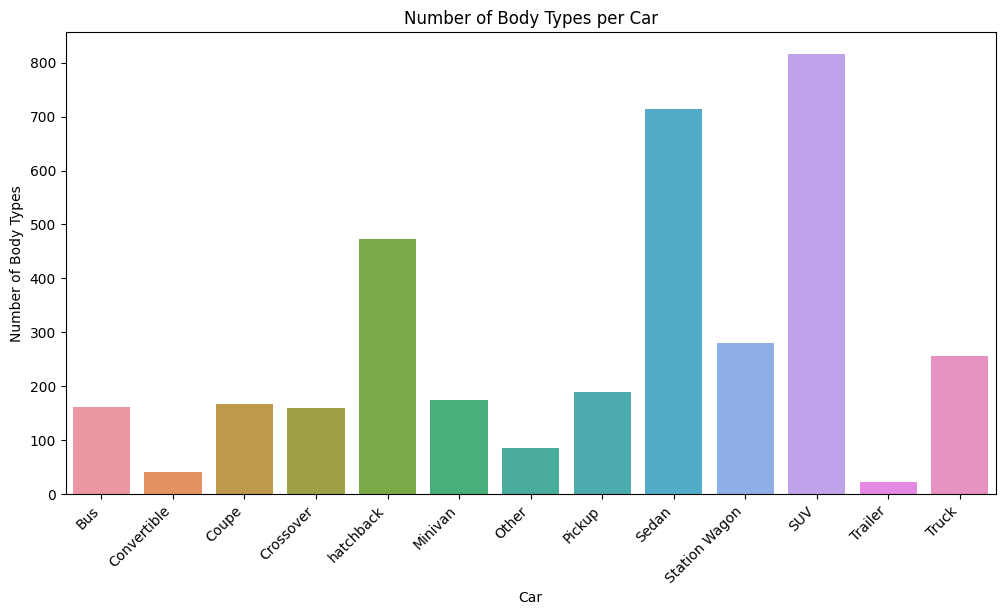

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.columns, y=df.sum(axis=0))
plt.title('Number of Body Types per Car')
plt.xlabel('Car')
plt.ylabel('Number of Body Types')
plt.xticks(rotation=45, ha='right')
plt.show()